In [3]:
#importing libraries
import pandas as pd
import numpy as np


In [4]:
#Pull data
SS_data = pd.read_excel("Table of Size Standards_Effective July 14 2022 (2).xlsx", sheet_name = 'table_of_size_standards-all')

In [4]:
SS_data

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.5,NaN,NaN
...,...,...,...,...,...
1144,813930,Labor Unions and Similar Labor Organizations,14.5,NaN,NaN
1145,813940,Political Organizations,12.5,NaN,NaN
1146,813990,"Other Similar Organizations (except Business, ...",12,NaN,NaN
1147,NaN,Sector 92 – Public Administration,NaN,NaN,See footnote 17


In [8]:
#First 5 rows
SS_data.head()


,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.5,NaN,NaN


In [6]:
#Last 5 rows
SS_data.tail()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
1144,813930,Labor Unions and Similar Labor Organizations,14.5,NaN,NaN
1145,813940,Political Organizations,12.5,NaN,NaN
1146,813990,"Other Similar Organizations (except Business, ...",12,NaN,NaN
1147,NaN,Sector 92 – Public Administration,NaN,NaN,See footnote 17
1148,NaN,(Small business size standards are not establi...,NaN,NaN,NaN


In [7]:
SS_data.info()
# The data contains 1149 entries consisting of 2 different data types. 5 columns with a decent aount of Null data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NAICS Codes                             1126 non-null   object 
 1   NAICS Industry Description              1060 non-null   object 
 2   Size standards 
in millions of dollars  532 non-null    object 
 3   Size standards in number of employees   505 non-null    float64
 4   Footnotes                               39 non-null     object 
dtypes: float64(1), object(4)
memory usage: 45.0+ KB


In [9]:
#Looking for specific Null count
SS_data.isnull().sum()
# Luckily we are only interested in the top two columns for this analysis so the nulls should'nt be too big of an issue to deal with. 

NAICS Codes                                  23
NAICS Industry Description                   89
Size standards \nin millions of dollars     617
Size standards in number of employees       644
Footnotes                                  1110
dtype: int64

In [11]:
#Pulling relevant records for cleaning and replacing dataframe
SS_data = SS_data[SS_data['NAICS Codes'].isnull()]


In [12]:
SS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 1148
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NAICS Codes                             0 non-null      object 
 1   NAICS Industry Description              23 non-null     object 
 2   Size standards 
in millions of dollars  0 non-null      object 
 3   Size standards in number of employees   0 non-null      float64
 4   Footnotes                               1 non-null      object 
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


In [15]:
#Next I want to create a new column called 'LookupCodes' 
#I will convert the NAICS Industry Description colun to a string and then slice the codes out
SS_data['LookupCodes'] = SS_data['NAICS Industry Description'].str.slice(start = 7, stop = 9)

In [17]:
#Checking code
SS_data.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes,LookupCodes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN,11
71,NaN,"Sector 21 – Mining, Quarrying, and Oil and Gas...",NaN,NaN,NaN,21
103,NaN,Sector 22 – Utilities,NaN,NaN,NaN,22
119,NaN,Sector 23 – Construction,NaN,NaN,NaN,23
156,NaN,Sector 31 – 33 – Manufacturing,NaN,NaN,NaN,31


In [18]:
#Creating column for sector
SS_data['Sector'] = SS_data['NAICS Industry Description'].str.slice(start = 12, stop = 538) #index 537 was the maximum string length

In [19]:
#Success
SS_data.head()

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes,LookupCodes,Sector
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN,11,"Agriculture, Forestry, Fishing and Hunting"
71,NaN,"Sector 21 – Mining, Quarrying, and Oil and Gas...",NaN,NaN,NaN,21,"Mining, Quarrying, and Oil and Gas Extraction"
103,NaN,Sector 22 – Utilities,NaN,NaN,NaN,22,Utilities
119,NaN,Sector 23 – Construction,NaN,NaN,NaN,23,Construction
156,NaN,Sector 31 – 33 – Manufacturing,NaN,NaN,NaN,31,33 – Manufacturing


In [22]:
#Pulling relevent columns only and replacing data frame
SS_data = SS_data[['NAICS Industry Description', 'LookupCodes', 'Sector']]

In [24]:
SS_data

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
103,Sector 22 – Utilities,22,Utilities
119,Sector 23 – Construction,23,Construction
156,Sector 31 – 33 – Manufacturing,31,33 – Manufacturing
538,Sector 42 – Wholesale Trade,42,Wholesale Trade
539,(These NAICS codes shall not be used to classi...,NA,codes shall not be used to classify Governmen...
614,Sector 44 - 45 – Retail Trade,44,45 – Retail Trade
615,(These NAICS codes shall not be used to classi...,NA,codes shall not be used to classify Governmen...
694,Sector 48 - 49 – Transportation and Warehousing,48,49 – Transportation and Warehousing


In [28]:
#revising data frame to only contain records with lookup codes = numeric
SS_data = SS_data[SS_data['LookupCodes'].str.isnumeric()]

In [29]:
SS_data

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
103,Sector 22 – Utilities,22,Utilities
119,Sector 23 – Construction,23,Construction
156,Sector 31 – 33 – Manufacturing,31,33 – Manufacturing
538,Sector 42 – Wholesale Trade,42,Wholesale Trade
614,Sector 44 - 45 – Retail Trade,44,45 – Retail Trade
694,Sector 48 - 49 – Transportation and Warehousing,48,49 – Transportation and Warehousing
764,Sector 51 – Information,51,Information
802,Sector 52 – Finance and Insurance,52,Finance and Insurance


In [35]:
#Renaming/Replacing values in 'Sector'
SS_data['Sector'] = np.where(SS_data['Sector'] == '33 – Manufacturing', 'Manufacturing', SS_data['Sector'])
SS_data['Sector'] = np.where(SS_data['Sector'] == '45 – Retail Trade', 'Retail Trade', SS_data['Sector'])
SS_data['Sector'] = np.where(SS_data['Sector'] == '49 – Transportation and Warehousing', 'Transportation and Warehousing', SS_data['Sector'])

<ipython-input-35-6b9867254347>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS_data['Sector'] = np.where(SS_data['Sector'] == '33 – Manufacturing', 'Manufacturing', SS_data['Sector'])
<ipython-input-35-6b9867254347>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS_data['Sector'] = np.where(SS_data['Sector'] == '45 – Retail Trade', 'Retail Trade', SS_data['Sector'])
<ipython-input-35-6b9867254347>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [36]:
SS_data

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
71,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
103,Sector 22 – Utilities,22,Utilities
119,Sector 23 – Construction,23,Construction
156,Sector 31 – 33 – Manufacturing,31,Manufacturing
538,Sector 42 – Wholesale Trade,42,Wholesale Trade
614,Sector 44 - 45 – Retail Trade,44,Retail Trade
694,Sector 48 - 49 – Transportation and Warehousing,48,Transportation and Warehousing
764,Sector 51 – Information,51,Information
802,Sector 52 – Finance and Insurance,52,Finance and Insurance


In [37]:
#During the next couple steps I will insert additional records to make up for the missing lookupCodes from the sectors that were grouped together.
#In addition I will reset the index to make the new dat frame more readable
SS_data.loc [len(SS_data.index)] = ['Sector 31 – 33 – Manufacturing', 32, 'Manufacturing']
SS_data.loc [len(SS_data.index)] = ['Sector 31 – 33 – Manufacturing', 33, 'Manufacturing']

SS_df2 = {'NAICS Industry Description': 'Sector 44 - 45 – Retail Trade', 'LookupCodes': 45, 'Sector': 'Retail Trade'}
SS_data = SS_data.append(SS_df2, ignore_index = True) #this will reset the index starting at 0

C:\Users\mkpth\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [38]:
SS_data.loc [len(SS_data.index)] = ['Sector 48 - 49 – Transportation and Warehousing', 49, 'Transportation and Warehousing']

In [39]:
SS_data

,NAICS Industry Description,LookupCodes,Sector
0,"Sector 11 – Agriculture, Forestry, Fishing and...",11,"Agriculture, Forestry, Fishing and Hunting"
1,"Sector 21 – Mining, Quarrying, and Oil and Gas...",21,"Mining, Quarrying, and Oil and Gas Extraction"
2,Sector 22 – Utilities,22,Utilities
3,Sector 23 – Construction,23,Construction
4,Sector 31 – 33 – Manufacturing,31,Manufacturing
5,Sector 42 – Wholesale Trade,42,Wholesale Trade
6,Sector 44 - 45 – Retail Trade,44,Retail Trade
7,Sector 48 - 49 – Transportation and Warehousing,48,Transportation and Warehousing
8,Sector 51 – Information,51,Information
9,Sector 52 – Finance and Insurance,52,Finance and Insurance


In [40]:
#Goin to export the data to a csv so we can use it for EDA!
SS_data.to_csv('clean_SS_data.csv')

In [41]:
#running code again because I forgot to remove the index
SS_data.to_csv('clean_SS_data.csv', index = False)


Exploratory Analysis

In [43]:
#Importing additional libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setting options
%matplotlib inline

pd.set_option('display.max_column', 55)

In [44]:
#Getting data
df = pd.read_csv('public_up_to_150k_12_220703 (1).csv')

In [47]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,7803247307,04/30/2020,304,PPP,APEX MD,5310 Twin Hickory Rd,GLEN ALLEN,VA,23059,03/19/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,124336,"Blue Ridge Bank, National Association",1 E Market St Imperial Plaza,MARTINSVILLE,VA,24112,U,N,N,Existing or more than 2 years old,GLEN ALLEN,HENRICO,VA,23059-1000,VA-07,7.0,621111.0,Unanswered,Unknown/NotStated,2000.0,70000.0,NaN,10000.0,NaN,3000.0,NaN,Limited Liability Company(LLC),124336,"Blue Ridge Bank, National Association",MARTINSVILLE,VA,Unanswered,Unanswered,NaN,78452.83,12/02/2020
1,7890008407,02/12/2021,353,PPS,1ST AMERICAN HOME HEALTH CARE SERVICESINC.,6216 Old Franconia Rd Ste A,Alexandria,VA,22310-3401,05/19/2022,Paid in Full,60,100,85000.0,85000.0,0.0,NaN,499141,"Readycap Lending, LLC",200 Connell Drive Suite 4000,BERKELEY HEIGHTS,NJ,07922,U,N,N,Existing or more than 2 years old,Alexandria,FAIRFAX,VA,22310-3401,VA-08,7.0,621610.0,Unanswered,Not Hispanic or Latino,1.0,84994.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,499141,"Readycap Lending, LLC",BERKELEY HEIGHTS,NJ,Male Owned,Non-Veteran,NaN,85973.42,04/13/2022
2,8235537001,04/08/2020,304,PPP,"QUALITY LANDSCAPE SOLUTIONS, LLC",14637 HOLDING POND CT,MIDLOTHIAN,VA,23112-4195,02/11/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,MIDLOTHIAN,CHESTERFIELD,VA,23112-4195,VA-07,8.0,561730.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,85637.50,01/11/2021
3,8336827200,04/28/2020,304,PPP,EATS NATURAL FOODS INC,708A North MAIN ST,BLACKSBURG,VA,24060-3634,02/19/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73099,The National Bank of Blacksburg,100 S Main St,BLACKSBURG,VA,24060-4859,U,Y,N,Existing or more than 2 years old,BLACKSBURG,MONTGOMERY,VA,24060-3634,VA-09,19.0,445110.0,White,Not Hispanic or Latino,NaN,63750.0,NaN,21250.0,NaN,NaN,NaN,Corporation,73099,The National Bank of Blacksburg,BLACKSBURG,VA,Female Owned,Unanswered,NaN,85612.47,01/25/2021
4,8497097305,05/01/2020,304,PPP,DETAIL JANITORIAL SERVICES OF VIRGINIA INC.,836 CALLAWAY RD,ROCKY MOUNT,VA,24151-4971,05/13/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,107359,Freedom First FCU,5240 Valleypark Dr,ROANOKE,VA,24019-3002,R,Y,N,Existing or more than 2 years old,ROCKY MOUNT,FRANKLIN,VA,24151-4971,VA-05,28.0,561720.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Corporation,107359,Freedom First FCU,ROANOKE,VA,Unanswered,Unanswered,NaN,85809.86,04/13/2021


In [48]:
#checking for nulls/data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599879 entries, 0 to 599878
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   599879 non-null  int64  
 1   DateApproved                 599879 non-null  object 
 2   SBAOfficeCode                599879 non-null  int64  
 3   ProcessingMethod             599879 non-null  object 
 4   BorrowerName                 599871 non-null  object 
 5   BorrowerAddress              599873 non-null  object 
 6   BorrowerCity                 599874 non-null  object 
 7   BorrowerState                599879 non-null  object 
 8   BorrowerZip                  599874 non-null  object 
 9   LoanStatusDate               549778 non-null  object 
 10  LoanStatus                   599879 non-null  object 
 11  Term                         599879 non-null  int64  
 12  SBAGuarantyPercentage        599879 non-null  int64  
 13 

In [49]:
#pulling nulls
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        8
BorrowerAddress                     6
BorrowerCity                        5
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  50101
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                 178
FranchiseName                  591645
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [51]:
df = df.loc[df['BorrowerName'].notnull()]

In [56]:
#adding some columns for analysis
df['year_approved'] = pd.DatetimeIndex(df['DateApproved']).year
df['month_approved'] = pd.DatetimeIndex(df['DateApproved']).month

df['year_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).year
df['month_forgiven'] = pd.DatetimeIndex(df['ForgivenessDate']).year

In [58]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,year_forgiven,month_forgiven
0,7803247307,04/30/2020,304,PPP,APEX MD,5310 Twin Hickory Rd,GLEN ALLEN,VA,23059,03/19/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,124336,"Blue Ridge Bank, National Association",1 E Market St Imperial Plaza,MARTINSVILLE,VA,24112,U,N,N,Existing or more than 2 years old,...,23059-1000,VA-07,7.0,621111.0,Unanswered,Unknown/NotStated,2000.0,70000.0,NaN,10000.0,NaN,3000.0,NaN,Limited Liability Company(LLC),124336,"Blue Ridge Bank, National Association",MARTINSVILLE,VA,Unanswered,Unanswered,NaN,78452.83,12/02/2020,2020,4,2020.0,2020.0
1,7890008407,02/12/2021,353,PPS,1ST AMERICAN HOME HEALTH CARE SERVICESINC.,6216 Old Franconia Rd Ste A,Alexandria,VA,22310-3401,05/19/2022,Paid in Full,60,100,85000.0,85000.0,0.0,NaN,499141,"Readycap Lending, LLC",200 Connell Drive Suite 4000,BERKELEY HEIGHTS,NJ,07922,U,N,N,Existing or more than 2 years old,...,22310-3401,VA-08,7.0,621610.0,Unanswered,Not Hispanic or Latino,1.0,84994.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,499141,"Readycap Lending, LLC",BERKELEY HEIGHTS,NJ,Male Owned,Non-Veteran,NaN,85973.42,04/13/2022,2021,2,2022.0,2022.0
2,8235537001,04/08/2020,304,PPP,"QUALITY LANDSCAPE SOLUTIONS, LLC",14637 HOLDING POND CT,MIDLOTHIAN,VA,23112-4195,02/11/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,...,23112-4195,VA-07,8.0,561730.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,85637.50,01/11/2021,2020,4,2021.0,2021.0
3,8336827200,04/28/2020,304,PPP,EATS NATURAL FOODS INC,708A North MAIN ST,BLACKSBURG,VA,24060-3634,02/19/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73099,The National Bank of Blacksburg,100 S Main St,BLACKSBURG,VA,24060-4859,U,Y,N,Existing or more than 2 years old,...,24060-3634,VA-09,19.0,445110.0,White,Not Hispanic or Latino,NaN,63750.0,NaN,21250.0,NaN,NaN,NaN,Corporation,73099,The National Bank of Blacksburg,BLACKSBURG,VA,Female Owned,Unanswered,NaN,85612.47,01/25/2021,2020,4,2021.0,2021.0
4,8497097305,05/01/2020,304,PPP,DETAIL JANITORIAL SERVICES OF VIRGINIA INC.,836 CALLAWAY RD,ROCKY MOUNT,VA,24151-4971,05/13/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,107359,Freedom First FCU,5240 Valleypark Dr,ROANOKE,VA,24019-3002,R,Y,N,Existing or more than 2 years old,...,24151-4971,VA-05,28.0,561720.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Corporation,107359,Freedom First FCU,ROANOKE,VA,Unanswered,Unanswered,NaN,85809.86,04/13/2021,2020,5,2021.0,2021.0


In [62]:
#1st round
FirstRound = df.loc[ df['ProcessingMethod'] == 'PPP']

In [61]:
SecondRound = df.loc[ df['ProcessingMethod'] == 'PPS']

## Categorical Variables

### Univariable

C:\Users\mkpth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProcessingMethod', ylabel='count'>

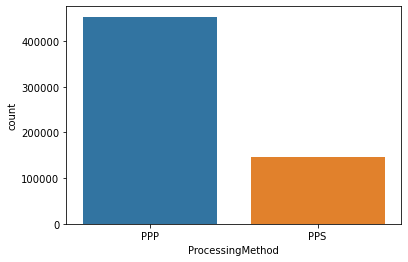

In [64]:
#How many records are in each processing method?
sns.countplot(df['ProcessingMethod'])

C:\Users\mkpth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BorrowerState', ylabel='count'>

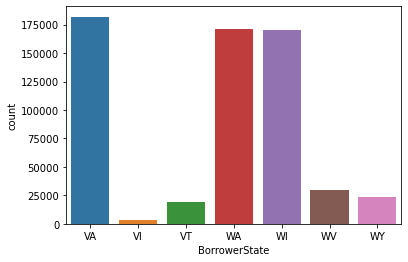

In [65]:
#What states are people borrowing in?
sns.countplot(df['BorrowerState'])
#Virginia, washington, and wisconson dominate the data set with over 150,000 loans each

C:\Users\mkpth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

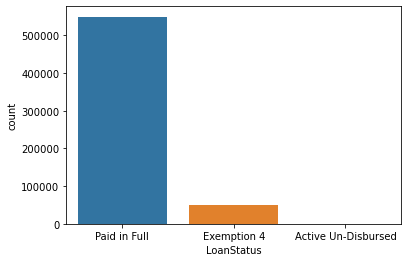

In [66]:
sns.countplot(df['LoanStatus'])

C:\Users\mkpth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

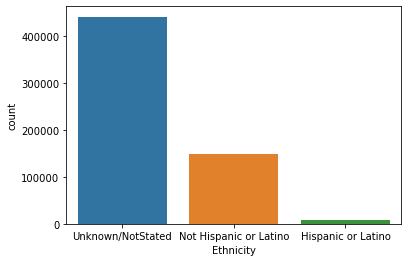

In [67]:
#This data could be private or untarcked. may be worth looking into
sns.countplot(df['Ethnicity'])

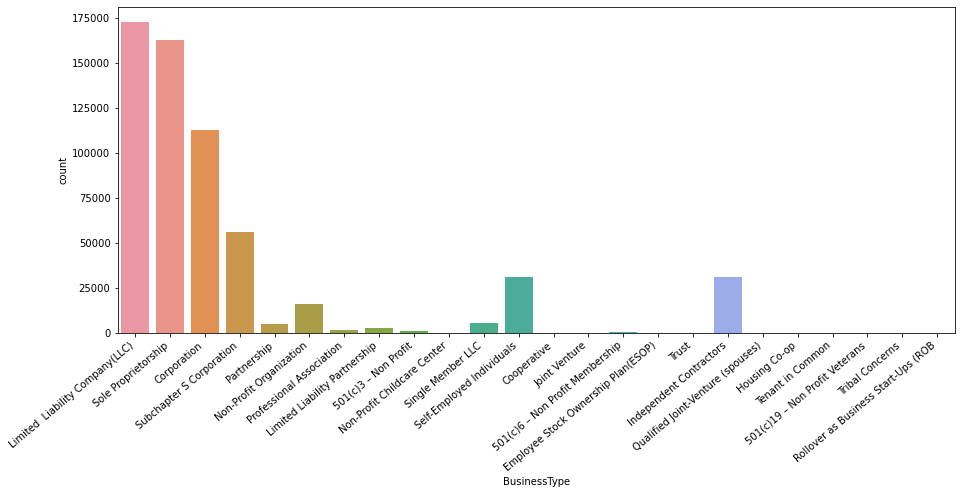

In [68]:
##Rotate the ticklabels
plt.figure(figsize=(15,6)) # this creates a figure that's 8 inches wide, 4 inches high (much easier to read)
ax = sns.countplot(x="BusinessType", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") #rotates the x labels sp tht they aren't overlapping
#plt.tight_layout()
plt.show()
#We can see that thr msjority of the loans go yto LLC's, Sole proprietorships, or corporations which is easy to understand

### BiVariate

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

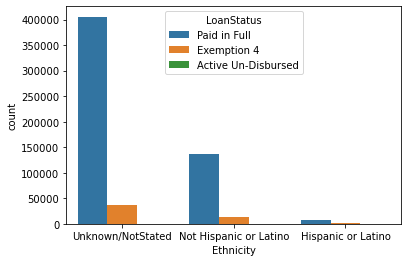

In [69]:
## Plotting Ethnicity Against Loan Status
sns.countplot(x = 'Ethnicity' , hue ='LoanStatus' , data = df)

In [70]:
#cross tabulation -> Exploring borrower ethnicity by state
pd.crosstab(df['BorrowerState'],df['Ethnicity'])

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
BorrowerState,,,
VA,2753,39449,139714
VI,163,891,2059
VT,74,4990,14366
WA,3661,40170,127649
WI,1761,47726,120977
WV,158,9499,20295
WY,403,6095,17018


In [71]:
pd.crosstab(df['year_approved'], df['BorrowerState'])

BorrowerState,VA,VI,VT,WA,WI,WV,WY
year_approved,,,,,,,
2020,86730,1864,10785,90871,76659,15687,12161
2021,95186,1249,8645,80609,93805,14265,11355


In [72]:
pd.crosstab(df['Ethnicity'],df['LoanStatus'])

LoanStatus,Active Un-Disbursed,Exemption 4,Paid in Full
Ethnicity,,,
Hispanic or Latino,0,1020,7953
Not Hispanic or Latino,4,12651,136165
Unknown/NotStated,3,36429,405646


### Numerical -> Discrete

In [73]:
#Descriptive stats
df['CurrentApprovalAmount'].describe()
#Mean loan amount is $27,250, however the standard deviation is giangantic. This tells us that there are some outliers.
#Min value is literally just $1.80 and the max is just under $150,000.

count    599871.000000
mean      27250.259802
std       28315.811342
min           1.800000
25%        8600.000000
50%       19377.000000
75%       33327.000000
max      149999.990000
Name: CurrentApprovalAmount, dtype: float64

###Checking Outliers

<AxesSubplot:xlabel='CurrentApprovalAmount'>

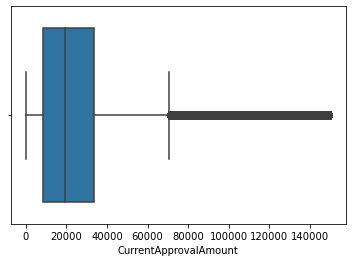

In [74]:
sns.boxplot(x = df['CurrentApprovalAmount'])
#About 75 percent of the CurrentApprovalAmount is greater than 8700 dollars per the boxplot below.
#As you can see we are showing a large amount of outliers beyond the maximum 

<AxesSubplot:xlabel='LoanStatus', ylabel='CurrentApprovalAmount'>

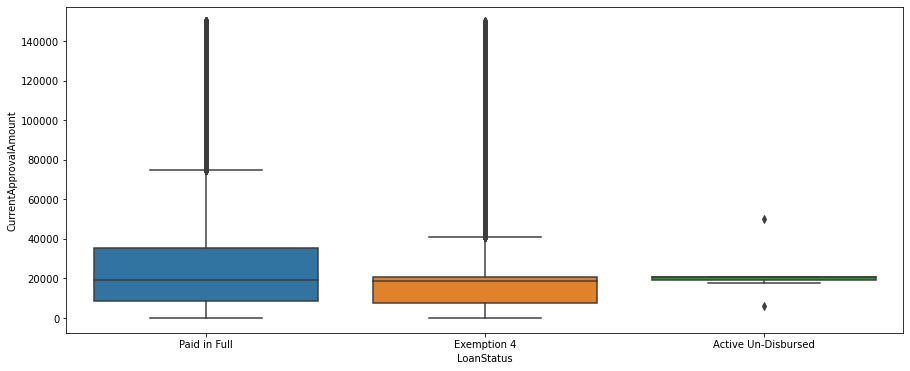

In [75]:
plt.figure(figsize=(15,6)) 
sns.boxplot(x="LoanStatus", y="CurrentApprovalAmount", data=df)


C:\Users\mkpth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentApprovalAmount', ylabel='Density'>

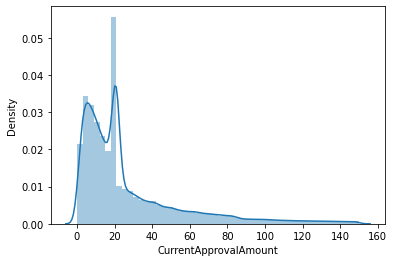

In [76]:
sns.distplot(df['CurrentApprovalAmount']/10**3)
#data is positively skewed and does not appear to be normally distributed

In [77]:
#Analyzing the body measure of the above diagram
print("Skewness: %f" % df['CurrentApprovalAmount'].skew())
print("Kurtosis: %f" % df['CurrentApprovalAmount'].kurt())

Skewness: 1.958542
Kurtosis: 3.808650


In [78]:
#Our kurtosis value tells us that our data is leptokurtic which means it is fat-tailed(AKA has a ton of outliers)

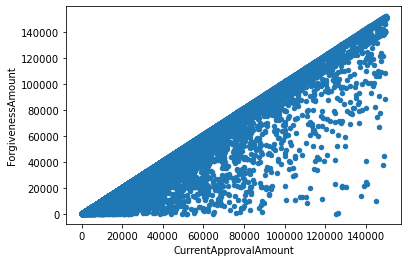

In [79]:
#scatter plot ForgivenessAmount/CurrentApprovalAmount
var = 'ForgivenessAmount'
data = pd.concat([df['CurrentApprovalAmount'], df[var]], axis=1)
data.plot.scatter(x='CurrentApprovalAmount', y=var);

<AxesSubplot:>

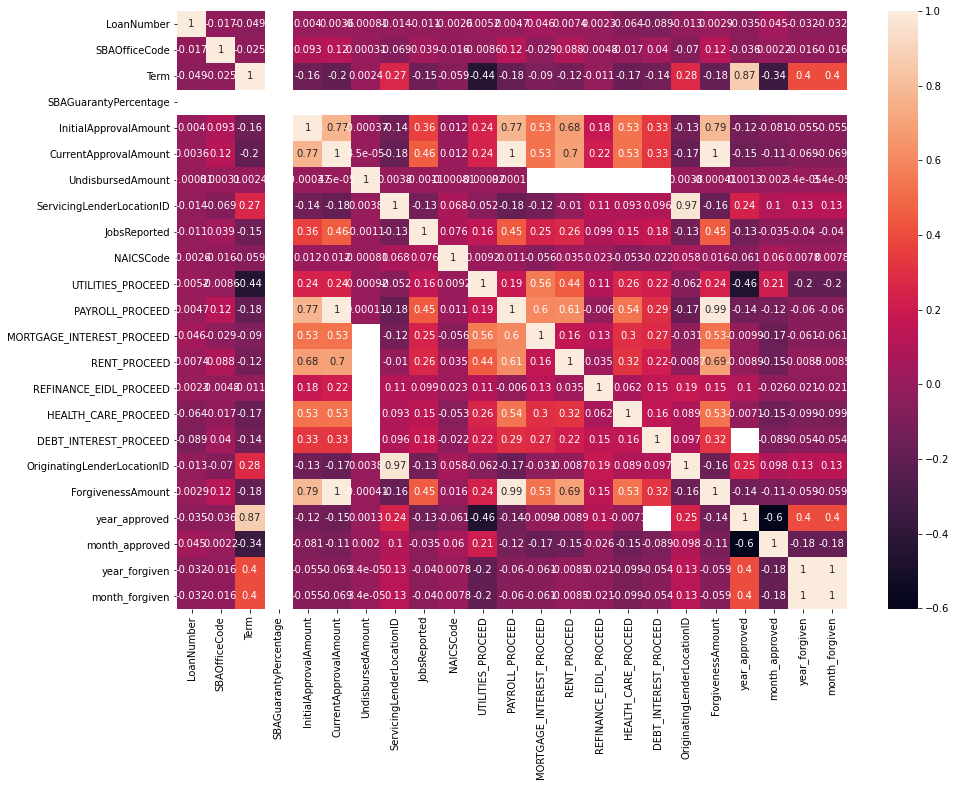

In [80]:
#correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(matrix, annot=True)